# Calibration of a microphone

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

from drc.sound import Sound
from drc.measurements import Amplitude
from drc.measurements.frequency.responses import FrequencyResponse, SMOOTHING_WINDOW_SIZE, TREBLE_SMOOTHING_WINDOW_SIZE
from drc.measurements.frequency import calibrations
from drc.measurements.frequency.calibrations import Calibrator
from drc.measurements import Sampler

# FrequencyResponse.FREQUENCY_TO_CENTER = 1000

Functions:  
calibration from : comparison between two measurements:  

- file vs. mic
- file vs. file
- mic vs. file
- file vs. file

# Devices indexing

In [3]:
from pprint import pprint

pprint(Sound.scan_devices(0))

{'info': {'defaultInputDevice': 1,
          'defaultOutputDevice': 7,
          'deviceCount': 12,
          'index': 0,
          'name': 'MME',
          'structVersion': 1,
          'type': 2},
 'input_devices': {0: {'defaultSampleRate': 44100.0,
                       'maxInputChannels': 2,
                       'maxOutputChannels': 0,
                       'name': 'Microsoft Sound Mapper - Input'},
                   1: {'defaultSampleRate': 44100.0,
                       'maxInputChannels': 1,
                       'maxOutputChannels': 0,
                       'name': '麥克風 (USB PnP Sound Device)'},
                   2: {'defaultSampleRate': 44100.0,
                       'maxInputChannels': 2,
                       'maxOutputChannels': 0,
                       'name': '麥克風排列 (Realtek High Definition '},
                   3: {'defaultSampleRate': 44100.0,
                       'maxInputChannels': 1,
                       'maxOutputChannels': 0,
                      

# Microphones

## Measurement microphone

### Use UMIK-1

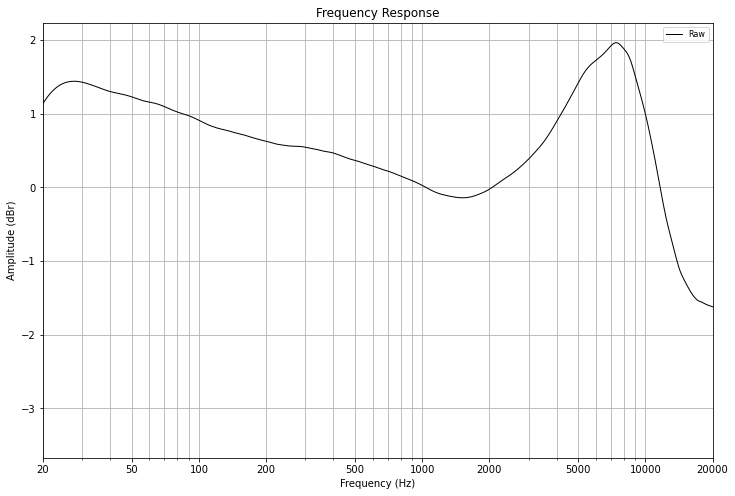

In [4]:
from drc.measurements.frequency.calibrations.miniDSP import UMIK1

fn_calibration = 'UMIK-1 cal file 7103946.txt'
# fn = 'UMIK-1 cal file 7103946_90deg.txt'

measurement_mic = UMIK1().load(file_name = fn_calibration, n_header_lines = 2)
measurement_mic.frequency_response.plot();

### Or use other calibrated microphone

In [5]:
# mic_name = 'Felyby' 

# measurement_mic = calibrations.Microphone().load(f'{mic_name} calibration file.csv')
# measurement_mic.frequency_response.plot()

## Microphone to be calibrated

We can calculate sensitivity if dBSPL, dBFS and gain are known.  
Assuming gain_dB = 18, the relationship between dBSPL and dBFS can be obtained with the RTA function of REW

In [6]:
# mic_name = 'C-Media'
# dBSPL = 98.03  # read from REW RTA
# dBFS = -19.85  # read from REW RTA
# mic_gain_dB = 18

mic_name = 'Felyby'
dBSPL = 91.1  # read from REW RTA
dBFS = -25.9  # read from REW RTA
mic_gain_dB = 18

# mic_name = 'Logitech QuickCam Pro' 
# dBSPL = 106.00  # read from REW RTA
# dBFS = -10.996  # read from REW RTA
# mic_gain_dB = 18


mic_sensitivity_dBFS = Amplitude.get_sensitivity_dBFS_by_dBFS(dBFS, dBSPL, mic_gain_dB)
mic = calibrations.Microphone(sensitivity_dBFS = mic_sensitivity_dBFS, gain_dB = mic_gain_dB) 
mic_sensitivity_dBFS

-41.02059991327962

# Get frequency response from microphone

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


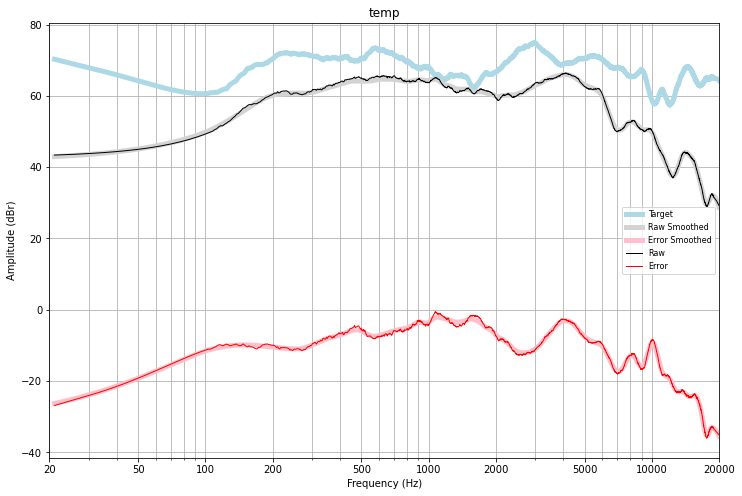

In [7]:
fr_target, _ = measurement_mic.get_frequency_response(input_device_idx = 4)
fr_measurement, _ = mic.get_frequency_response(input_device_idx = 1)

fr_measurement, fr_calibration = Calibrator.calibrate(fr_measurement, fr_target)
fr_measurement.plot_graph();

### Dump calibration file

In [8]:
fn_calibration = f'{mic_name} calibration file.csv'

mic.responses = fr_calibration.responses
mic.dump(fn_calibration)

# Read target frequency response from csv file

### Load calibration file and convert into FrequencyResponse

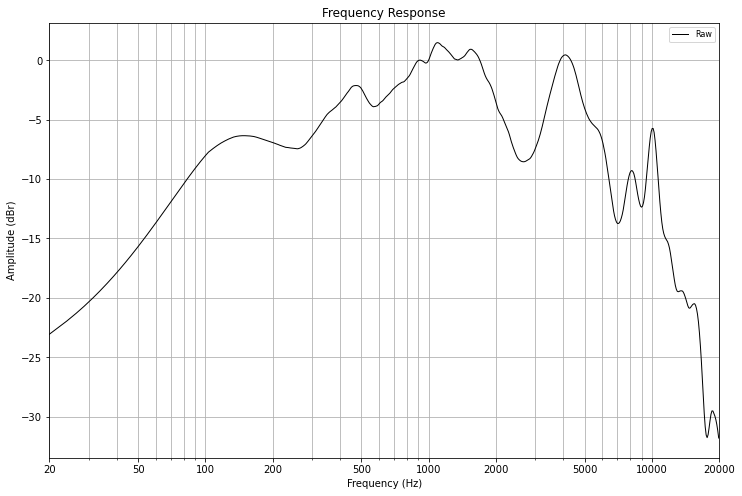

In [9]:
mic_rev = calibrations.Microphone().load(fn_calibration)
mic_rev.frequency_response.plot();

### Read calibraton.csv into FrequencyResponse

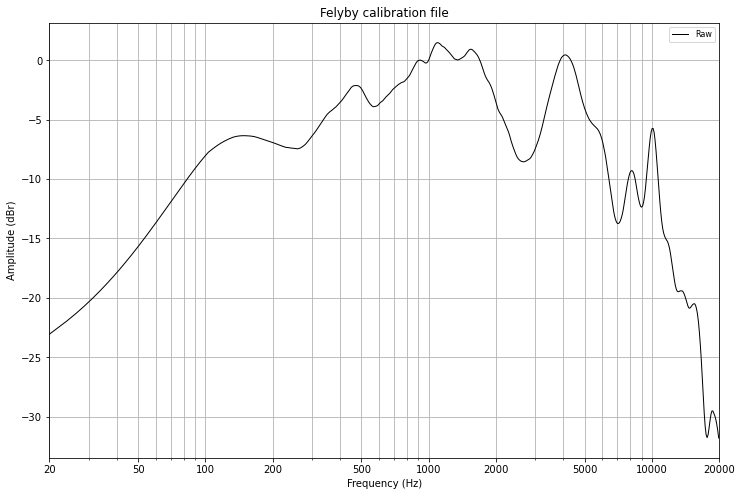

In [10]:
fr_calibration = FrequencyResponse.read_from_csv(fn_calibration)
fr_calibration.plot();